# Detecting the anomalous activity of a ship’s engine

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
engine = pd.read_csv('https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv')

# View dataframe
engine

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220
...,...,...,...,...,...,...
19530,681,3.598792,7.300853,1.083391,76.206955,69.848780
19531,580,2.243040,5.242489,1.471350,76.884907,87.098119
19532,616,3.310048,3.787693,6.001031,75.889810,72.220009
19533,1163,2.731726,3.703595,2.951684,76.784626,81.400088


The six different variables or features can be seen (columns): Engine rpm, lubrication oil pressure, fuel pressure, coolant pressure, lubrication oil temperature and coolant temperature. Tt looks like that there are 19535 different engine observations (rows).

In [ ]:
# Identify missing values
engine.isnull().sum()

,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0


In [ ]:
# Identify duplicate values
engine.duplicated().sum()

np.int64(0)

Each feature shows '0' for missing values, meaning that there are no missing values in the dataset. Checking for duplications, shows that there are no duplicate rows.

In [ ]:
# check the arguments of the describe() function
help(engine.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None) -> 'Self' method of pandas.core.frame.DataFrame instance
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in the result. Ignore

The help-function shows that there is a percentiles argument that can be included in the descriptive statistics. I will use this to find the 95 percentile.

In [ ]:
# Generate descriptive statistics including 95th percentile
engine.describe(percentiles=[0.25, 0.5, 0.75, 0.95])

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411
95%,1324.000000,5.058040,12.208475,4.438415,84.940778,88.612891
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912


The mean values are: for engine rpm 791, lubrication oil pressure 3.30, fuel pressure 6.66, coolant pressure 2.33, lubrication oil temp 77.6, and coolant temperature 78.4. The median values (50%) are: 746, 3.16, 6.20, 2.17, 76.8, 78.3 respectively. The range of engine rpm beyond the 95 percentile is from 1324 (95th percentile) to 2239 (max value). The range of lubrication oil pressure beyond the 95 percentile is from 5.06 to 7.27.

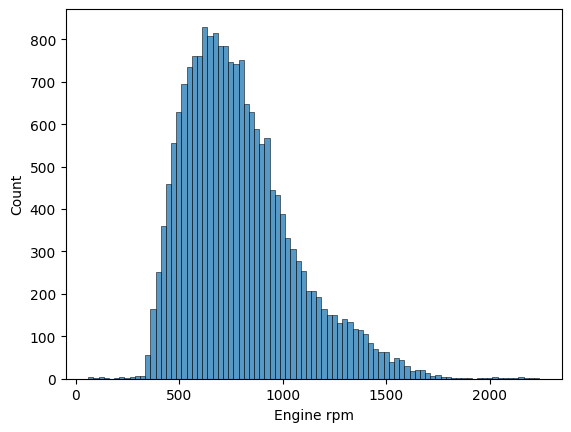

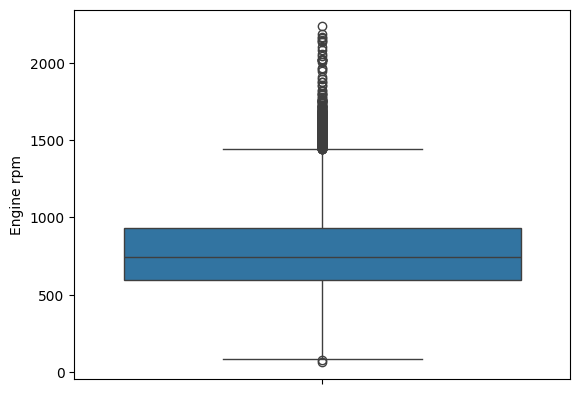

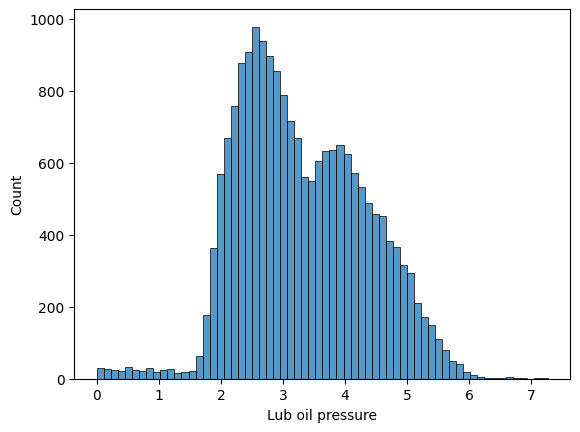

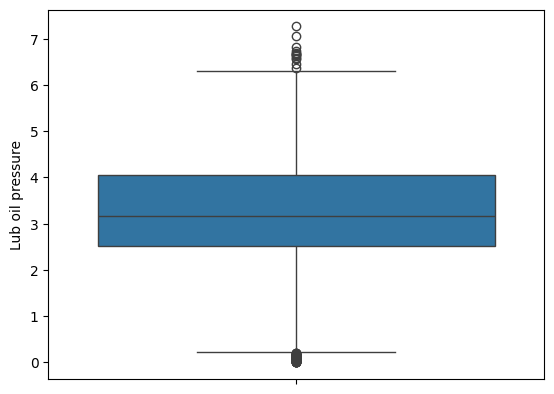

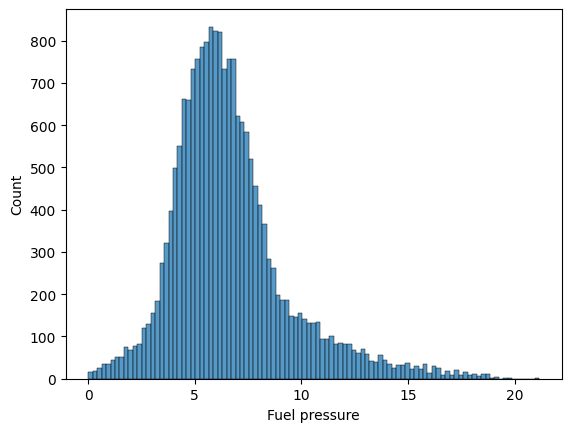

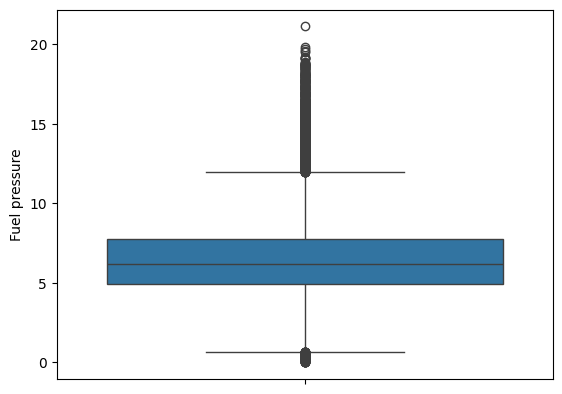

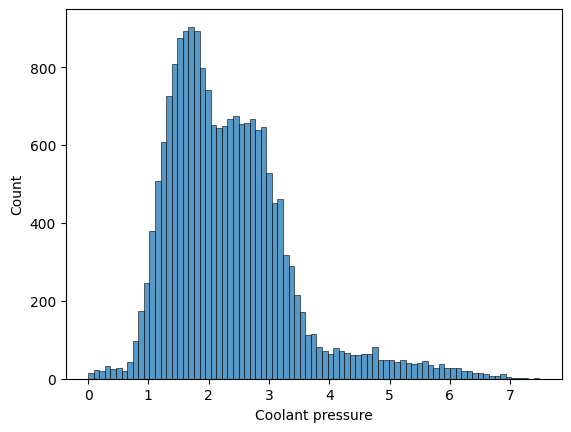

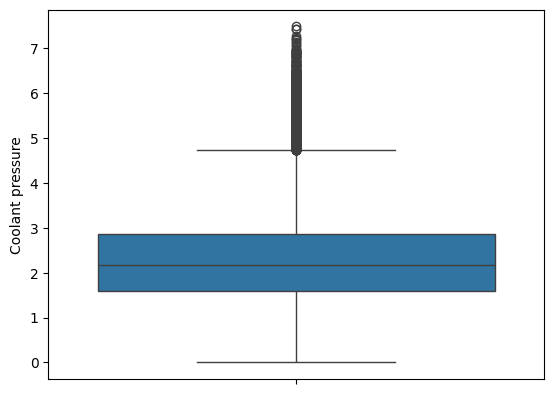

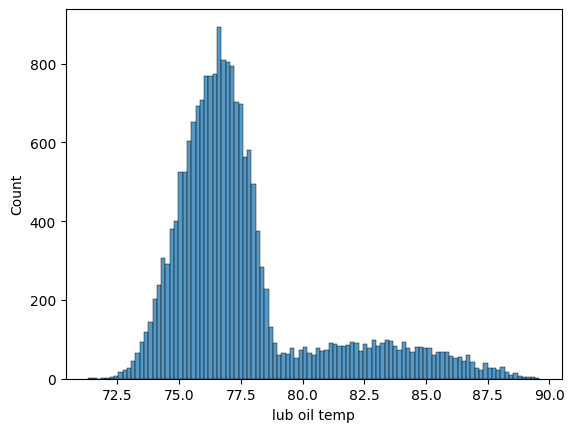

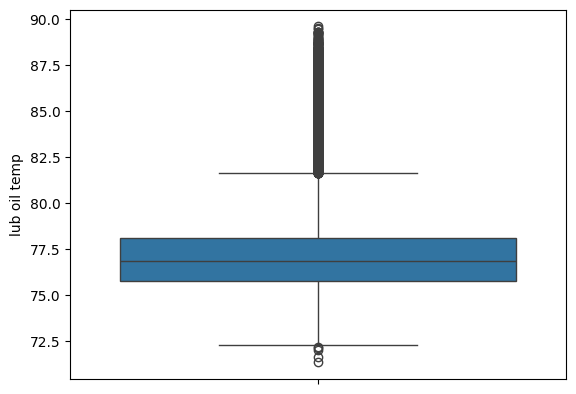

In [ ]:
# Visualise the data to obtain the distribution and extreme values
sns.histplot(engine['Engine rpm'])
plt.show()
sns.boxplot(engine['Engine rpm'])
plt.show()
sns.histplot(engine['Lub oil pressure'])
plt.show()
sns.boxplot(engine['Lub oil pressure'])
plt.show()
sns.histplot(engine['Fuel pressure'])
plt.show()
sns.boxplot(engine['Fuel pressure'])
plt.show()
sns.histplot(engine['Coolant pressure'])
plt.show()
sns.boxplot(engine['Coolant pressure'])
plt.show()
sns.histplot(engine['lub oil temp'])
plt.show()
sns.boxplot(engine['lub oil temp'])
plt.show()

I generated histograms to understand the distribution and boxplots to check for outliers. Engine rpm shows a distribution that is skewed to the right, with many outliers in the boxplot in the higher values. Lubrication oil pressure shows a distribution similar to a normal distribution, with a slight dip in the middle and a peak on each side. The boxplot shows outliers in both lower and higher values. Fuel pressure shows a distribution which is close to a normal distribution, with a tail to the right (slightly skewed). This is confirmed by many outliers in the higher values of the boxplot. Both Coolant pressure and lubrication oil temperature are skewed to the right, with a long tail on the right side. Both have many outliers in the higher values in the boxplot.

<function matplotlib.pyplot.show(close=None, block=None)>

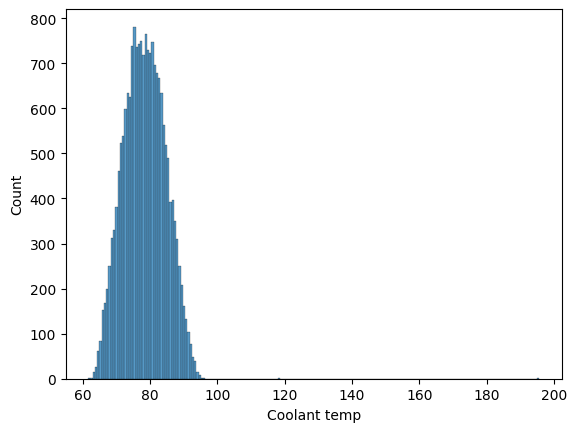

In [ ]:
# Visualise coolant temperature
sns.histplot(engine['Coolant temp'])
plt.show

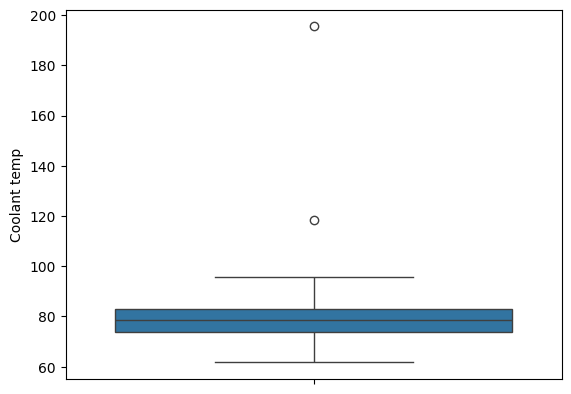

In [ ]:
# Visualise Coolant temperature boxplot
sns.boxplot(engine['Coolant temp'])
plt.show()

A seperate histogram for coolant temperature was generated as the histogram initially was not shown together with the other features. The histogram shows a normal distribution. The boxplot shows two outliers in the higher values.

From the descriptive statistics, we can see that the range of values differs between different variables/features. As I am particularly interested in the outliers and each of the histograms shows a Gaussian-like distrubution (a bell-shaped curve similar to normal distribution), I will use standardisation for feature scaling.

In [ ]:
# Feature scaling using standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
engine_scaled = scaler.fit_transform(engine)

# Convert the NumPy array back to a Pandas DataFrame
engine_scaled = pd.DataFrame(engine_scaled, columns=engine.columns)

# view output
engine_scaled.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491


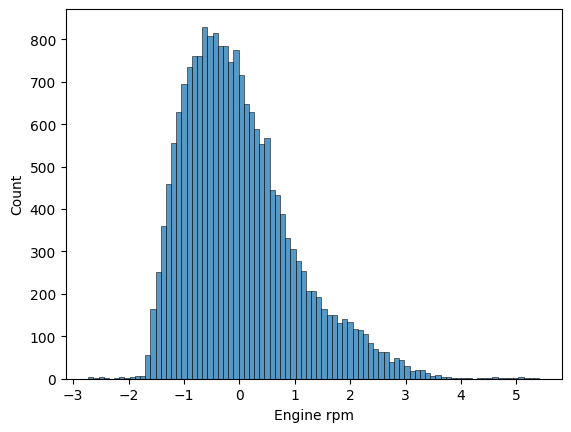

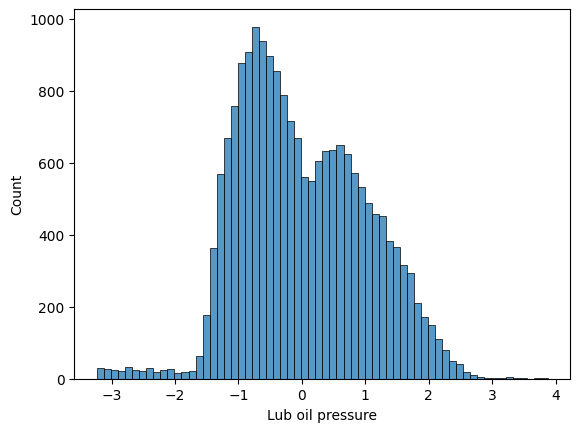

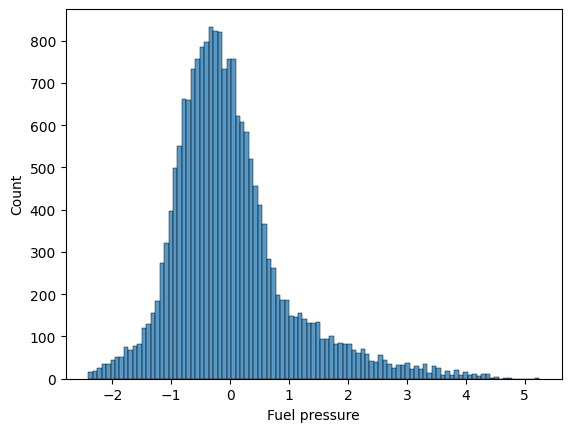

<function matplotlib.pyplot.show(close=None, block=None)>

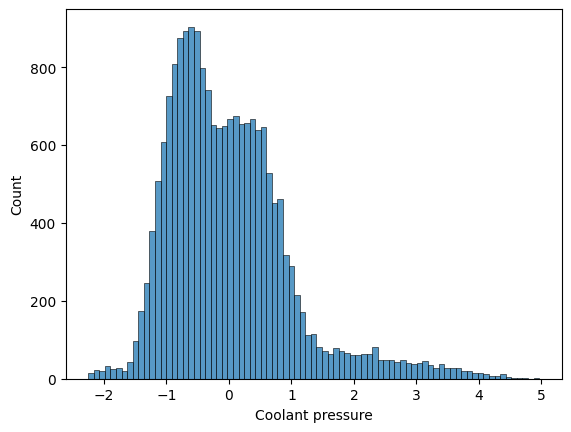

In [ ]:
# Generate histograms to check distribution has not changed
sns.histplot(engine_scaled['Engine rpm'])
plt.show()
sns.histplot(engine_scaled['Lub oil pressure'])
plt.show()
sns.histplot(engine_scaled['Fuel pressure'])
plt.show()
sns.histplot(engine_scaled['Coolant pressure'])
plt.show

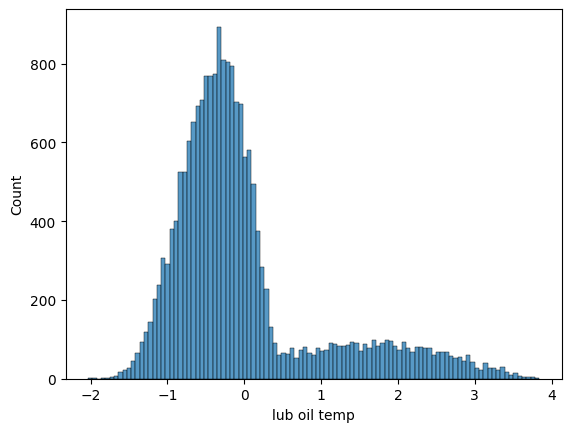

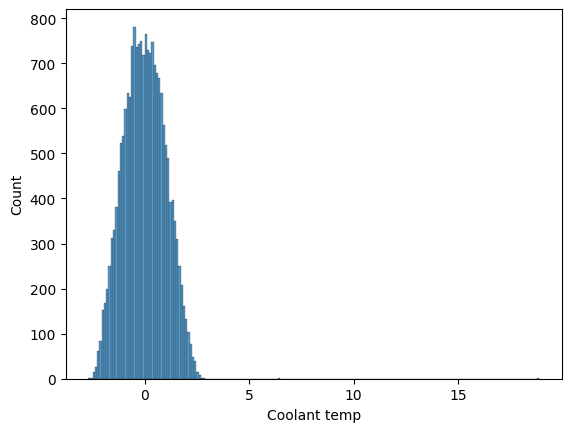

In [ ]:
# Generate histograms for resulting features
sns.histplot(engine_scaled['lub oil temp'])
plt.show()
sns.histplot(engine_scaled['Coolant temp'])
plt.show()

The histograms remain unchanged after feature scaling.

In [ ]:
# Calculate IQR and identify outliers for each feature, starting with engine RPM
# Calculate quantiles and IQR
Q1 = engine_scaled['Engine rpm'].quantile(0.25)
Q3 = engine_scaled['Engine rpm'].quantile(0.75)
IQR = Q3 - Q1
# View output
print("Q1 is:", Q1)
print("Q3 is:", Q3)
print("IQR is:", IQR)

Q1 is: -0.7407923962642559
Q3 is: 0.5334769057889833
IQR is: 1.2742693020532392


The Q1 has a negative value. This is because scaled data are used. Both scaled or unscaled data can be used for the IQR method.

In [ ]:
# Filter the outliers
# Calculate the upper and lower limits
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
# View output
print("Upper limit is:", upper_limit)
print("Lower limit is:", lower_limit)

Upper limit is: 2.444880858868842
Lower limit is: -2.6521963493441145


The values of the upper and lower limit are shown. Any values under the lower limit or above the upper limit are anomalies

In [ ]:
# Filter out the lower and upper bounds to find all the anomalies
anomalies_enginerpm = engine_scaled[(engine_scaled['Engine rpm'] < lower_limit) | (engine_scaled['Engine rpm'] > upper_limit)]
# View output
anomalies_enginerpm

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
113,2.629855,-0.026963,-1.065293,0.154286,2.381887,-0.432513
115,-2.728802,0.619474,0.518973,-0.473084,-0.133790,-0.699133
122,2.476644,-1.214155,-0.176517,-1.037528,1.841534,0.691332
144,3.627597,-1.572300,-0.843105,0.181408,2.927422,0.638962
148,2.626119,-0.842346,-1.125510,-0.368566,1.475816,0.890421
...,...,...,...,...,...,...
19419,2.607434,-0.606121,-1.231913,0.683060,-0.222513,-0.671450
19421,2.689645,-0.961546,0.290964,-0.841954,-0.991116,0.244909
19436,2.801751,0.744493,-0.562474,0.009900,-0.254581,-0.835049
19472,2.510276,-0.496927,1.078423,-0.044512,-0.041233,-0.462925


464 engines have anomalous values for the engine rpm.

In [ ]:
# Calculate IQR to find outliers for Lubrication oil pressure
Q1_lub = engine_scaled['Lub oil pressure'].quantile(0.25)
Q3_lub = engine_scaled['Lub oil pressure'].quantile(0.75)
IQR_lub = Q3_lub - Q1_lub
# Calculate lower and upper limits
upper_limit_lub = Q3_lub + 1.5 * IQR_lub
lower_limit_lub = Q1_lub - 1.5 * IQR_lub
# Filter out the lower and upper bounds to find anomalies
anomalies_lub = engine_scaled[(engine_scaled['Lub oil pressure'] < lower_limit_lub) | (engine_scaled['Lub oil pressure'] > upper_limit_lub)]
# View output
anomalies_lub

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
493,1.056637,-3.096920,-1.089700,-0.496892,-0.193850,-1.865159
902,2.536434,3.202455,0.500423,-0.545222,0.608629,0.283152
1221,-0.699687,-3.145955,-0.435309,1.060571,-1.064463,-0.026012
1432,-0.823003,-3.078721,1.723212,-0.022131,-0.921660,-0.591358
1807,0.275634,3.353066,-0.972792,-1.149690,-0.909821,0.321741
...,...,...,...,...,...,...
17443,-1.054689,-3.229745,-0.402042,-1.164923,0.335023,-1.168165
17703,2.727014,-3.048504,0.861815,0.832275,-0.501629,0.703904
17991,0.638109,3.668251,-0.609023,-0.107643,-0.318290,0.303561
18477,-0.034526,-3.097262,-0.031256,-0.751159,0.988107,-0.791425


66 engines have anomalous values for lubrication oil pressure using the IQR method.

In [ ]:
# Calculate IQR and find outliers for Fuel pressure
Q1_fuel = engine_scaled['Fuel pressure'].quantile(0.25)
Q3_fuel = engine_scaled['Fuel pressure'].quantile(0.75)
IQR_fuel = Q3_fuel - Q1_fuel
# Calculate upper and lower limits
upper_limit_fuel = Q3_fuel + 1.5 * IQR_fuel
lower_limit_fuel = Q1_fuel - 1.5 * IQR_fuel
# Filter out the lower and upper bounds to find anomalies
anomalies_fuel = engine_scaled[(engine_scaled['Fuel pressure'] < lower_limit_fuel) | (engine_scaled['Fuel pressure'] > upper_limit_fuel)]
# view output
anomalies_fuel

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
6,0.350371,-1.242409,3.203269,-0.784073,0.423100,0.385163
7,-0.804319,2.145811,2.339428,-1.046273,0.144000,-1.046107
9,0.055159,0.629502,5.245553,-0.736041,-0.874377,-1.017425
72,1.520008,0.492405,2.565872,1.592708,-0.251932,0.835943
90,0.309265,0.101254,2.639916,-0.838448,0.052815,0.667602
...,...,...,...,...,...,...
19438,-0.793108,1.133224,3.134838,-0.803683,-0.614493,0.813315
19448,0.413897,1.423884,3.555680,-0.282305,-0.517838,0.786878
19449,0.593267,-0.292504,2.337900,0.270875,0.026618,1.420651
19467,1.975905,-1.012180,2.861838,-0.856781,-0.650319,-0.691550


1135 engines have anomalous values for Fuel pressure using the IQR method.

In [ ]:
# Calculate IQR and find outliers for Coolant pressure
Q1_cool = engine_scaled['Coolant pressure'].quantile(0.25)
Q3_cool = engine_scaled['Coolant pressure'].quantile(0.75)
IQR_cool = Q3_cool - Q1_cool
# Calculate upper and lower limits
upper_limit_cool = Q3_cool + 1.5 * IQR_cool
lower_limit_cool = Q1_cool - 1.5 * IQR_cool
# Filter out the lower and upper bounds to find anomalies
anomalies_cool = engine_scaled[(engine_scaled['Coolant pressure'] < lower_limit_cool) | (engine_scaled['Coolant pressure'] > upper_limit_cool)]
# View output
anomalies_cool

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158
17,1.946010,2.603387,0.328859,3.470415,0.030684,1.648979
39,0.877268,0.899132,0.411240,3.332236,-0.511164,0.734620
98,-0.651108,-0.306441,-0.038610,3.726697,-0.398098,0.903194
157,-0.961267,2.562869,4.125055,3.484390,-0.112710,-0.595022
...,...,...,...,...,...,...
19451,0.432582,2.298506,0.504042,2.420593,-0.333132,1.058959
19460,0.570846,0.032267,-0.081672,2.377145,0.401021,1.699400
19494,0.301792,-0.121525,0.792389,3.006537,-0.477482,1.221631
19496,0.085054,0.902526,-0.188099,2.674450,1.204528,-0.879367


785 engines have anomalous values for Coolant pressure using the IQR method.

In [ ]:
# Calculate IQR and find anomalies for lubrication oil temperature
Q1_lub_temp = engine_scaled['lub oil temp'].quantile(0.25)
Q3_lub_temp = engine_scaled['lub oil temp'].quantile(0.75)
IQR_lub_temp = Q3_lub_temp - Q1_lub_temp
# Calculate upper and lower limits
upper_limit_lub_temp = Q3_lub_temp + 1.5 * IQR_lub_temp
lower_limit_lub_temp = Q1_lub_temp - 1.5 * IQR_lub_temp
# Filter out the lower and upper bounds to find anomalies
anomalies_lub_temp = engine_scaled[(engine_scaled['lub oil temp'] < lower_limit_lub_temp) | (engine_scaled['lub oil temp'] > upper_limit_lub_temp)]
# View output
anomalies_lub_temp

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690
8,-0.957530,-0.141282,0.731902,-1.032686,1.531806,0.374652
13,0.697899,1.040411,-0.006349,0.476935,3.341434,0.009885
14,-0.086842,-1.529507,-0.053272,-0.929853,1.715068,0.830216
16,0.866057,-1.267569,-0.006775,1.036756,2.842300,-0.172841
...,...,...,...,...,...,...
19500,-0.385791,-0.619700,-0.533580,0.351917,2.110701,-1.427569
19515,0.107475,-0.096778,-0.071587,-0.522793,1.649828,0.792119
19516,0.895952,-1.251692,0.570131,-1.785356,2.321748,-0.701239
19526,0.772636,0.717150,-0.375093,-0.497816,1.339502,0.091986


2617 engines have anomalous values for lubrication oil temperature using the IQR method.

In [ ]:
# Calculate the IQR and find anomalies for Coolant temperature
Q1_cool_temp = engine_scaled['Coolant temp'].quantile(0.25)
Q3_cool_temp = engine_scaled['Coolant temp'].quantile(0.75)
IQR_cool_temp = Q3_cool_temp - Q1_cool_temp
# Calculate the upper and lower limits
upper_limit_cool_temp = Q3_cool_temp + 1.5 * IQR_cool_temp
lower_limit_cool_temp = Q1_cool_temp - 1.5 * IQR_cool_temp
# Filter out the lower and upper bounds to find anomalies
anomalies_cool_temp = engine_scaled[(engine_scaled['Coolant temp'] < lower_limit_cool_temp) | (engine_scaled['Coolant temp'] > upper_limit_cool_temp)]
# view output
anomalies_cool_temp

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
3242,-0.116737,1.570307,-1.470887,-0.567024,0.073954,6.435824
10663,-1.256479,-1.265615,0.416709,-0.690683,-0.361321,18.867119


Only two engines have anomalous values for Coolant temperature. This is in line with the boxplot for coolant temperature, which shows 2 outliers.

In [ ]:
# Create a new column for each feature that will indicate in binary if the value of that feature is an outlier as per IQR calculations.
# Initialize the column with 0s
engine_scaled['Engine rpm_outlier'] = 0

# Set to 1 for outlier indices
engine_scaled.loc[engine_scaled.index.isin(anomalies_enginerpm.index), 'Engine rpm_outlier'] = 1

# Repeat for other features
engine_scaled['Lub oil pressure_outlier'] = 0
engine_scaled.loc[engine_scaled.index.isin(anomalies_lub.index), 'Lub oil pressure_outlier'] = 1

engine_scaled['Fuel pressure_outlier'] = 0
engine_scaled.loc[engine_scaled.index.isin(anomalies_fuel.index), 'Fuel pressure_outlier'] = 1

engine_scaled['Coolant pressure_outlier'] = 0
engine_scaled.loc[engine_scaled.index.isin(anomalies_cool.index), 'Coolant pressure_outlier'] = 1

engine_scaled['lub oil temp_outlier'] = 0
engine_scaled.loc[engine_scaled.index.isin(anomalies_lub_temp.index), 'lub oil temp_outlier'] = 1

engine_scaled['Coolant temp_outlier'] = 0
engine_scaled.loc[engine_scaled.index.isin(anomalies_cool_temp.index), 'Coolant temp_outlier'] = 1

# View the updated DataFrame
engine_scaled.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm_outlier,Lub oil pressure_outlier,Fuel pressure_outlier,Coolant pressure_outlier,lub oil temp_outlier,Coolant temp_outlier
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412,0,0,0,0,0,0
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158,0,0,0,1,0,0
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690,0,0,0,0,1,0
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913,0,0,0,0,0,0
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491,0,0,0,0,0,0


The new columns were created, showing two outliers: one for Coolant pressure (engine with index 1) and one for lubrication oil temperature (engine with index 2).

In [ ]:
# Identify a sample as an outlier only if two or more of the features fall under an outlier category for a particular sample.
sum_outliers = engine_scaled[['Engine rpm_outlier', 'Lub oil pressure_outlier', 'Fuel pressure_outlier', 'Coolant pressure_outlier', 'lub oil temp_outlier', 'Coolant temp_outlier']].sum(axis=1)
engine_scaled['outlier_2_or_more'] = sum_outliers.apply(lambda x: 1 if x >= 2 else 0)

# View output
engine_scaled.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm_outlier,Lub oil pressure_outlier,Fuel pressure_outlier,Coolant pressure_outlier,lub oil temp_outlier,Coolant temp_outlier,outlier_2_or_more
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412,0,0,0,0,0,0,0
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158,0,0,0,1,0,0,0
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690,0,0,0,0,1,0,0
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913,0,0,0,0,0,0,0
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491,0,0,0,0,0,0,0


A new column 'outlier' was added to the dataframe, showing whether two or more features fall under the outlier category, indicated with '1'.

In [ ]:
# generate dataframe with only outliers
engine_outliers_IQR = engine_scaled[engine_scaled['outlier_2_or_more'] == 1]
engine_outliers_IQR

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm_outlier,Lub oil pressure_outlier,Fuel pressure_outlier,Coolant pressure_outlier,lub oil temp_outlier,Coolant temp_outlier,outlier_2_or_more
113,2.629855,-0.026963,-1.065293,0.154286,2.381887,-0.432513,1,0,0,0,1,0,1
122,2.476644,-1.214155,-0.176517,-1.037528,1.841534,0.691332,1,0,0,0,1,0,1
131,0.144843,-0.070347,2.471453,0.224563,3.162084,-0.805470,0,0,1,0,1,0,1
144,3.627597,-1.572300,-0.843105,0.181408,2.927422,0.638962,1,0,0,0,1,0,1
148,2.626119,-0.842346,-1.125510,-0.368566,1.475816,0.890421,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19236,-0.075631,-1.455667,1.961579,-0.030763,2.313699,1.170885,0,0,1,0,1,0,1
19306,0.570846,0.876149,-0.567489,2.338951,2.155499,1.365848,0,0,0,1,1,0,1
19328,-0.075631,0.599957,-0.550175,3.143009,2.608148,-1.474074,0,0,0,1,1,0,1
19343,2.555118,-1.096079,-0.035157,-1.032393,2.343389,1.556600,1,0,0,0,1,0,1


A new dataframe 'engine_outliers' was created, showing only the rows with at least two outliers. The new dataframe contains 422 rows, meaning that there are 422 engines with at least two anomalous features.

In [ ]:
# Calculate the percentage of outliers using the IQR method with at least 2 features as outlier
print("the percentage of outliers using the IQR method with {} or more outlier features is: {}%".format(2, len(engine_outliers_IQR)/19535*100))

the percentage of outliers using the IQR method with 2 or more outlier features is: 2.160225236754543%


The percentage of anomalous engines is 2.2% out of the total number of engines, which is between 1-5%. This is a good proportion of anomalies. I will do the same for 3 and 4 or more outlier features.

In [ ]:
# Identify a sample as an outlier if three or more of the features fall under an outlier category for a particular sample.
engine_scaled['outlier_3_or_more'] = sum_outliers.apply(lambda x: 1 if x >= 3 else 0)

# generate dataframe with only outliers
engine_outliers_IQR2 = engine_scaled[engine_scaled['outlier_3_or_more'] == 1]
print(engine_outliers_IQR2.shape)

# Calculate the percentage of outliers using the IQR method with at least 3 features as outlier
print("the percentage of outliers using the IQR method with {} or more outlier features is: {}%".format(3, len(engine_outliers_IQR2)/19535*100))

(11, 14)
the percentage of outliers using the IQR method with 3 or more outlier features is: 0.05630918863578193%


In [ ]:
# Identify a sample as an outlier if four or more of the features fall under an outlier category for a particular sample.
engine_scaled['outlier_4_or_more'] = sum_outliers.apply(lambda x: 1 if x >= 4 else 0)

# generate dataframe with only outliers
engine_outliers_IQR3 = engine_scaled[engine_scaled['outlier_4_or_more'] == 1]
print(engine_outliers_IQR3.shape)

# Calculate the percentage of outliers using the IQR method with at least 4 features as outlier
print("the percentage of outliers using the IQR method with {} or more outlier features is: {}%".format(4, len(engine_outliers_IQR3)/19535*100))

(0, 15)
the percentage of outliers using the IQR method with 4 or more outlier features is: 0.0%


The percentage of anomalous engines using the IQR method with 3 or more and 4 or more anomalous features, is 0.06% and 0.0% respectively. This is less than 1% and therefore too low. The first model with at least 2 anomalous features therefore is the most suitable to detect anomalous engines.

In [ ]:
# Import library for One-Class SVM
from sklearn.svm import OneClassSVM

# Remove extra columns for One-Class SVM and other Machine Learning models
engine_scaled_ML = engine_scaled.drop(engine_scaled.columns[6:], axis=1)

# View dataframe
engine_scaled_ML

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491
...,...,...,...,...,...,...
19530,-0.411949,0.288774,0.233701,-1.208058,-0.461752,-1.382184
19531,-0.789372,-1.038290,-0.511826,-0.833709,-0.243824,1.397013
19532,-0.654845,0.006141,-1.038745,3.537070,-0.563698,-1.000134
19533,1.389218,-0.559945,-1.069205,0.594695,-0.276059,0.478951


In [ ]:
# Specify the One-Class SVM model
model = OneClassSVM(kernel='rbf', gamma=0.5, nu=0.05)
model.fit(engine_scaled_ML)
y_pred = model.predict(engine_scaled_ML)

# View output
print(y_pred)

[ 1 -1  1 ...  1  1  1]


The output shows whether the first and last observations are outliers according to the One-Class SVM model. To determine the number of outliers, I will add an outlier column to the dataframe.

In [ ]:
# Create a dataframe with the outliers after One-Class SVM
engine_outliers_SVM = engine_scaled_ML
engine_outliers_SVM['outlier_SVM'] = y_pred
engine_outliers_SVM

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,outlier_SVM
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412,1
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158,-1
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690,1
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913,1
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491,1
...,...,...,...,...,...,...,...
19530,-0.411949,0.288774,0.233701,-1.208058,-0.461752,-1.382184,1
19531,-0.789372,-1.038290,-0.511826,-0.833709,-0.243824,1.397013,1
19532,-0.654845,0.006141,-1.038745,3.537070,-0.563698,-1.000134,1
19533,1.389218,-0.559945,-1.069205,0.594695,-0.276059,0.478951,1


The new column is displayed in the dataframe.

In [ ]:
# Determine the number of outliers by making a dataframe
engine_outliers_SVM = engine_outliers_SVM[y_pred == -1]
engine_outliers_SVM

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,outlier_SVM
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158,-1
9,0.055159,0.629502,5.245553,-0.736041,-0.874377,-1.017425,-1
17,1.946010,2.603387,0.328859,3.470415,0.030684,1.648979,-1
25,0.619425,-0.373530,-0.860027,-1.999461,-1.064363,-0.071863,-1
35,2.177695,-0.744115,0.719102,-0.766376,1.486756,-1.871741,-1
...,...,...,...,...,...,...,...
19418,2.783067,1.440891,1.288045,-0.209072,1.207864,0.841445,-1
19433,0.727794,-0.366638,2.816375,2.556936,-0.696229,-1.388626,-1
19467,1.975905,-1.012180,2.861838,-0.856781,-0.650319,-0.691550,-1
19501,-1.275163,-2.548791,-0.921300,-1.336777,-0.891821,-0.892217,-1


A dataframe containing only rows with outliers, shows that there are 1113 observations that are classified as outliers.

In [ ]:
# Calculate 1-5% of 19535
print("1% is:", 19535*0.01)
print("5% is:", 19535*0.05)

# Calculate the number of outliers using One-Class SVM with gamma 0.5 and nu 0.05
print("the percentage of outliers using One-Class SVM with gamma {} and nu {} is: {}%".format(0.5, 0.05, len(engine_outliers_SVM)/19535*100))

1% is: 195.35
5% is: 976.75
the percentage of outliers using One-Class SVM with gamma 0.5 and nu 0.05 is: 5.339134886101869%


The percentage of outliers is 5.7%, which is slightly above the ideal range. As we want to aim for less outliers, I will lower the gamma value.

In [ ]:
# Specify the second One-Class SVM model
model2 = OneClassSVM(kernel='rbf', gamma=0.4, nu=0.05)
model2.fit(engine_scaled_ML)
y_pred2 = model2.predict(engine_scaled_ML)

# Create a dataframe with the outliers after One-Class SVM
engine_outliers_SVM2 = engine_scaled_ML
engine_outliers_SVM2 = engine_outliers_SVM2[y_pred2 == -1]
print(engine_outliers_SVM2.shape)

# Calculate the number of outliers using One-Class SVM with gamma 0.4 and nu 0.05
print("the percentage of outliers using One-Class SVM with gamma {} and nu {} is: {}%".format(0.4, 0.05, len(engine_outliers_SVM2)/19535*100))

(1021, 7)
the percentage of outliers using One-Class SVM with gamma 0.4 and nu 0.05 is: 5.226516508830305%


The percentage of outliers with the second One-Class SVM model, including a lower gamma value, results in 1021 (5.2%) outliers. This is slightly better. However, aiming for a lower percentage, I will now lower the nu value.

In [ ]:
# Specify the third One-Class SVM model
model3 = OneClassSVM(kernel='rbf', gamma=0.4, nu=0.04)
model3.fit(engine_scaled_ML)
y_pred3 = model3.predict(engine_scaled_ML)

# Create a dataframe with the outliers after One-Class SVM
engine_outliers_SVM3 = engine_scaled_ML
engine_outliers_SVM3 = engine_outliers_SVM3[y_pred3 == -1]
print(engine_outliers_SVM3.shape)

# Calculate the number of outliers using One-Class SVM with gamma 0.4 and nu 0.04
print("the percentage of outliers using One-Class SVM with gamma {} and nu {} is: {}%".format(0.4, 0.04, len(engine_outliers_SVM3)/19535*100))

(872, 7)
the percentage of outliers using One-Class SVM with gamma 0.4 and nu 0.04 is: 4.463782953672895%


The percentage of outliers with the third One-Class SVM model, including a lower nu value, results in 872 (4.5%) outliers. This is within the range of 1-5%.

In [ ]:
# Perform PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Make a dataframe without 'outlier SVM'
engine_scaled_PCA = engine_scaled_ML.drop('outlier_SVM', axis=1)

# Perform PCA
engine_scaled_2D = pca.fit_transform(engine_scaled_PCA)

# view output
print('standardised data:', engine_scaled_PCA.shape)
print('PCA data:', engine_scaled_2D.shape)
engine_scaled_PCA

standardised data: (19535, 6)
PCA data: (19535, 2)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491
...,...,...,...,...,...,...
19530,-0.411949,0.288774,0.233701,-1.208058,-0.461752,-1.382184
19531,-0.789372,-1.038290,-0.511826,-0.833709,-0.243824,1.397013
19532,-0.654845,0.006141,-1.038745,3.537070,-0.563698,-1.000134
19533,1.389218,-0.559945,-1.069205,0.594695,-0.276059,0.478951


PCA was performed for dimensionality reduction, reducing the number of features from 6 to 2.

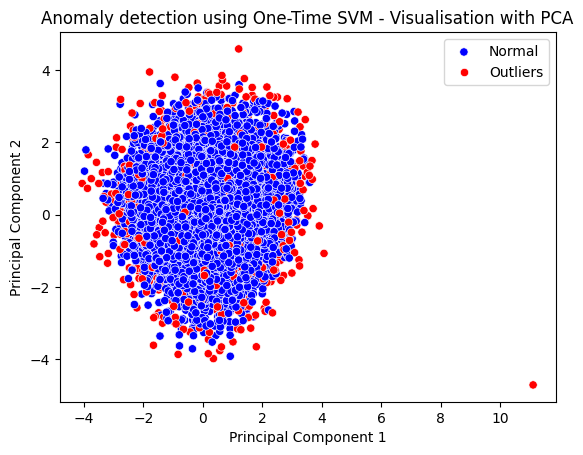

In [ ]:
# Before visualising, I need to update the 'outlier_SVM' feature to the new model.
engine_scaled_ML['outlier_SVM'] = y_pred3

# Visualise the output in 2D after performing PCA with outliers in different colours
sns.scatterplot(x=engine_scaled_2D[:, 0], y=engine_scaled_2D[:, 1], hue=engine_scaled_ML['outlier_SVM'], palette=["red", "blue"])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Anomaly detection using One-Time SVM - Visualisation with PCA')
plt.legend(labels=['Normal', 'Outliers'])

plt.show()

Compared with the IQR method, which requires finding outliers in each feature individually, the One-Class SVM Model allows to determine outliers by looking at several features combined. Therefore, One-Class SVM is better at handling complex data in an efficient and user-friendly way. The next step is using Isolation Forest methodologies to detect anomalies. For this method, I will be using the unscaled dataset.

In [ ]:
# View the unscaled dataframe
engine.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220


The unscaled dataframe has the original values and the six features, without the added anomaly columns.

In [ ]:
# Obtain libraries for Isolation Forest method
from sklearn.ensemble import IsolationForest

# Use Isolation Forest method for anomaly detection
model4 = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model4.fit(engine)
y_pred4 = model4.predict(engine)

# View output
print(y_pred4)

[ 1 -1 -1 ...  1  1  1]


In [ ]:
# Create a dataframe with the outliers after Isolation Forest
engine_outliers_model4 = engine
engine_outliers_model4 = engine_outliers_model4[y_pred4 == -1]
print(engine_outliers_model4.shape)

# Calculate the number of outliers using Isolation Forest with contamination 0.1
print("the percentage of outliers using Isolation Forest with contamination {} is: {}%".format(0.1, len(engine_outliers_model4)/19535*100))

(1954, 6)
the percentage of outliers using Isolation Forest with contamination 0.1 is: 10.002559508574354%


The percentage of outliers using the Isolation Forest method with contamination of 0.1 is 10.0%, which is quite high. I will try a lower proportion.

In [ ]:
# Use Isolation Forest method for anomaly detection
model5 = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model5.fit(engine)
y_pred5 = model5.predict(engine)

# Create a dataframe with the outliers after Isolation Forest
engine_outliers_model5 = engine
engine_outliers_model5 = engine_outliers_model5[y_pred5 == -1]
print(engine_outliers_model5.shape)

# Calculate the number of outliers using Isolation Forest with contamination 0.05
print("the percentage of outliers using Isolation Forest with contamination {} is: {}%".format(0.05, len(engine_outliers_model5)/19535*100))

(977, 6)
the percentage of outliers using Isolation Forest with contamination 0.05 is: 5.001279754287177%


The percentage of outlier using the Isolation Forest method with contamination of 0.05 is better: slightly more than 5%. I will now aim for a lower amount.

In [ ]:
# Use Isolation Forest method for anomaly detection
model6 = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
model6.fit(engine)
y_pred6 = model6.predict(engine)

# Create a dataframe with the outliers after Isolation Forest
engine_outliers_model6 = engine
engine_outliers_model6 = engine_outliers_model6[y_pred6 == -1]
print(engine_outliers_model6.shape)

# Calculate the number of outliers using Isolation Forest with contamination 0.03
print("the percentage of outliers using Isolation Forest with contamination {} is: {}%".format(0.03, len(engine_outliers_model6)/19535*100))

(587, 6)
the percentage of outliers using Isolation Forest with contamination 0.03 is: 3.0048630662912723%


In the final model, with contamination of 0.03, the percentage of outliers is 3.0%, which is a good result (between 1-5%).

Now I will use PCA to visualise the outliers from the Isolation Forest method, using the scaled dataset.

In [ ]:
# Add Isolation Forest outlier column to scaled dataset
engine_scaled_ML['outlier_IF'] = y_pred6
engine_scaled_ML.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,outlier_SVM,outlier_IF
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412,1,1
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158,-1,-1
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690,1,1
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913,1,1
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491,1,1


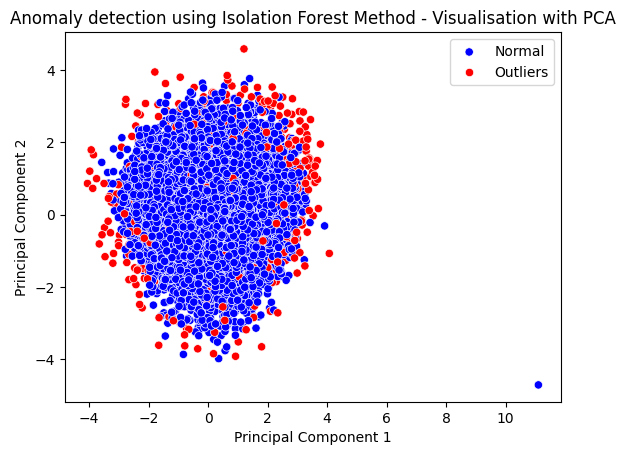

In [ ]:
# Visualise the outliers of the Isolation Forest Method in 2D after performing PCA
sns.scatterplot(x=engine_scaled_2D[:, 0], y=engine_scaled_2D[:, 1], hue=engine_scaled_ML['outlier_IF'], palette=["red", "blue"])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Anomaly detection using Isolation Forest Method - Visualisation with PCA')
plt.legend(labels=['Normal', 'Outliers'])

plt.show()

# Reflect

Both One-Class SVM and Isolation Forest methods are very effective in finding anomalies in large datasets.  Because Isolation Forest methods focus on finding the outliers first, while One-Class SVM focuses on finding normal data point first, the Isolation Forest methods are more efficient for very large datasets. Because both are unsupervised machine learning models, and the y is unknown, it is unknown which model predicts the anomalies more accurately.

### Reference:
Devabrat, M., 2022. Predictive Maintenance on Ship's Main Engine using AI. Available at: https://dx.doi.org/10.21227/g3za-v415. [Accessed 5 March 2024]

University of Cambridge, Institute of Continuing Education, 2025. CAM_DS_101 Applying statistics and core data science techniques in business: 5.2.4 Applying isolation forest methodologies. Available at: https://fourthrev.instructure.com/courses/840/modules [Accessed: 31 March 2025]. Password protected.